In [1]:
import numpy as np
from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink

In [9]:
# В URDF, единицы измерения являются метры и радианы 
robot_chain = Chain(name='robot_arm', links=[
    URDFLink(
        name="base",
        bounds=(-np.pi/2, np.pi/2), # от -90 до 90
        origin_translation=[0, 0, 0],
        origin_orientation=[0, 0, 0],
        rotation=[0, 0, 1],
    ),
    # Первое звено (соединение с базой, плечо)
    URDFLink(
        name="shoulder",
        bounds=(-2.0071, 1.1345),
        origin_translation=[0, 0, 0.02],
        origin_orientation=[0, 0, 0],
        rotation=[0, 1, 0],
    ),
    # Второе звено (локоть)
    URDFLink(
        name="elbow",
        bounds=(-1.7104, 1.4312),
        origin_translation=[0, 0, 0.105],
        origin_orientation=[0, 0, 0],
        rotation=[0, 1, 0],
    ),
    # Третье звено (запястье)
    URDFLink(
        name="wrist",
        bounds=(-1.2915, 1.8500),
        origin_translation=[0, 0, 0.096],
        origin_orientation=[0, 0, 0],
        rotation=[0, 1, 0],
    ),
    # Четвертое звено (крутит захват)
    URDFLink(
        name="wrist_rotational",
        bounds=(-np.pi/2, np.pi/2),
        origin_translation=[0, 0, 0.065],
        origin_orientation=[0, 0, 0],
        rotation=[0, 0, 1],
    ),
    # Манипулятор (захват)
    URDFLink(
        name="gripper",
        bounds=None,
        origin_translation=[0, 0, 0.11],
        origin_orientation=[0, 0, 0],
        rotation=None,
        joint_type='fixed',
    )
])

c:\projects\robot_manipulator\env\Lib\site-packages\ikpy\chain.py:60: UserWarning: Link gripper (index: 5) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


Передом считаем где перед манипулятором металическая платформа

pwm 10 = 90, значит вправо будет уменьшение угла, влево увеличение
pwm 11 = 115, значит наклон вперед будет уменьшение угла, назад увеличение
pwm 12 = 98, значит наклон вперед будет увеличение угла, назад уменьшение
pwm 13 = 74, значит наклон вперед будет увеличение угла, назад уменьшение
pwm 14 = 90, значит поворот клешни влевл будет увеличение угла, вправо уменьшение
pwm 15 = 142, закрытый - уменьшаем угл открываем

In [4]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

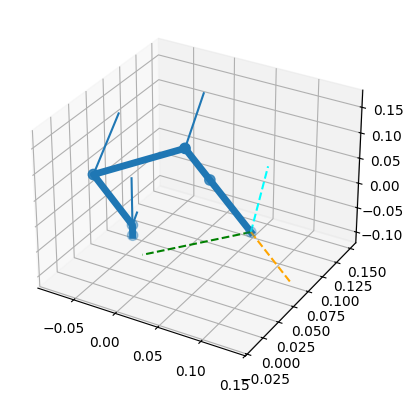

In [24]:
ax = matplotlib.pyplot.figure().add_subplot(111, projection='3d')

robot_chain.plot(robot_chain.inverse_kinematics([0.1, 0.05, 0.0]), ax, show=True)
matplotlib.pyplot.show()

In [25]:
angles_radians = robot_chain.inverse_kinematics([0.1, 0.05, 0.1])
angles_radians

array([ 0.4636471 , -0.97705337,  1.37562436,  1.56646872,  0.        ,
        0.        ])

In [26]:
angles_degrees = np.degrees(angles_radians)
angles_degrees

array([ 26.56502215, -55.98103437,  78.81747006,  89.75204611,
         0.        ,   0.        ])

In [9]:
robot_chain.links[0]

URDF Link base :
    Type : revolute
    Bounds : (0, 3.14)
    Origin Translation : [0 0 0]
    Origin Orientation : [0 0 0]
    Rotation : [0 0 1]
    Translation: None